In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
print('imported libs ..!')

imported libs ..!


In [2]:
login_data = pd.read_json('ultimate_challenge/logins.json')

In [3]:
login_data.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
login_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


### Aggregate login counts based on 15 min time intervals

In [5]:
login_data['count'] = 1

In [6]:
login_data.head()

,login_time,count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [7]:
login_data = login_data.sort_values(by="login_time").reset_index(drop=True)

In [8]:
login_agg_data = login_data.set_index("login_time").resample("15T").sum()

In [9]:
login_agg_data.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [10]:
login_agg_data['count'].sum()

93142

In [11]:
login_agg_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
count    9788 non-null int64
dtypes: int64(1)
memory usage: 152.9 KB


## EDA

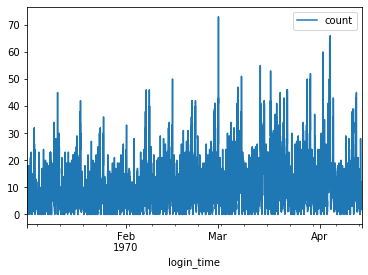

In [12]:
login_agg_data.plot()
plt.show()

### Since we have grouped for 15 min interval, there are 4 in an hour and 24*4 = 96 in a day

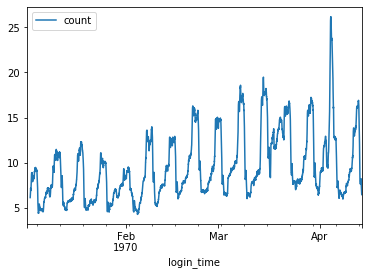

In [13]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html
login_agg_data.rolling(window=96).mean().plot()
plt.show()

Let us look at the same trend for the a single month (say Jan)

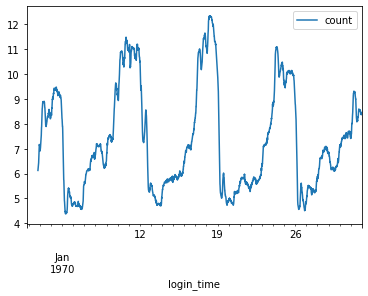

In [14]:
login_agg_data.loc['1970-01'].rolling(window=96).mean().plot()
plt.show()

We can observe that there is a periodic rise in logins probably a rise in weekends. Let us plot the demad for a week

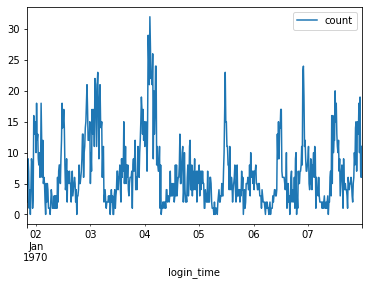

In [15]:
login_agg_data.loc['1970-01-01':'1970-01-07'].plot()
plt.show()

We can observe a high demand on 4th Jan

In [16]:
datetime.datetime(1970, 1, 4).weekday()

6

As expected it is a Sunday

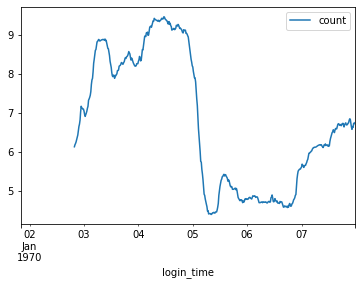

In [17]:
login_agg_data.loc['1970-01-01':'1970-01-07'].rolling(window=96).mean().plot()
plt.show()

Let us observe a weekend spikes. Consider a weekend from Friday 2nd Jan

In [18]:
datetime.datetime(1970, 1, 2).weekday()

4

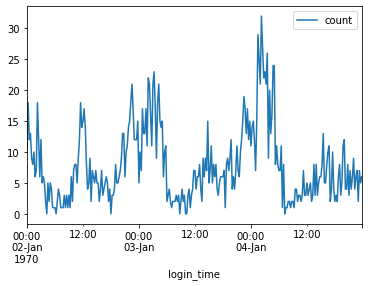

In [19]:
login_agg_data.loc['1970-01-02':'1970-01-04'].plot()
plt.show()

The demands are the highest at midnights in the weekends and also reasonably high in the afternoons. Let us see if the same applied to a non weekend couple of days. Let us take a mid week, wed-thu period

In [22]:
datetime.datetime(1970, 3, 4).weekday() # wednesday

2

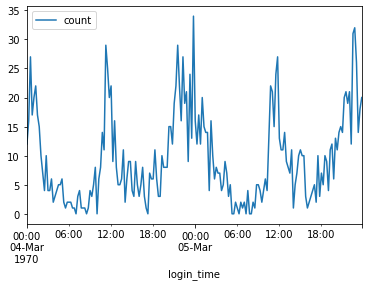

In [23]:
login_agg_data.loc['1970-03-04':'1970-03-05'].plot()
plt.show()

Again, we can observe the demand is highest around midnights and afternoons

As expected, the demand is higher on weekends than weekdays. It is also highe during midnight and afternoons for both weekdays and weekends